In [1]:
import pandas as pd
import numpy as np
import nltk

#    1. Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b) and create a word cloud to visualize frequently used words 

(Note: Select all paragraphs and join them together as a single string and pass it to python word cloud package)

In [5]:
!pip install selenium

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [481]:
from selenium import webdriver
browser=webdriver.Chrome('chromedriver.exe')               # should download chromedriver.exe and paste it into the file location

In [482]:
url='https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'
browser.get(url)

In [483]:
ptags=browser.find_elements_by_css_selector('p') 

In [484]:
for tag in ptags:
    print(tag.text)
    print('---------')

Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.
---------
Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.
---------
Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expe

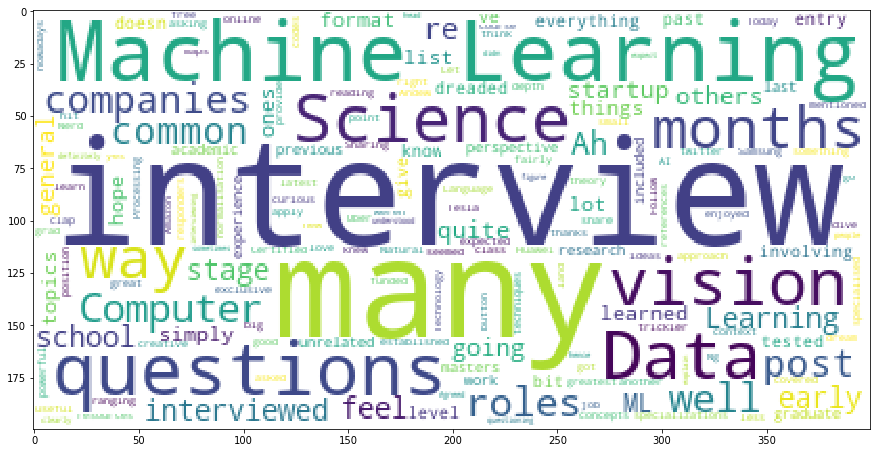

In [485]:
plt.figure(figsize=(15,8))
article=' '.join([para.text for para in ptags])
wc=WordCloud(background_color='white').generate(article)
plt.imshow(wc)
plt.show()

# 2. Using amazon reviews (https://bit.ly/2G4zbHA) data set do the following
       a. create a corpus using sklearn package. 
       b. Create the Document Term Matrix using unigrams
       c. Identify top 25 unigrams and filter their respective columns from DTM
       d. Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 
       e. Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

In [24]:
amazon=pd.read_csv('https://bit.ly/2G4zbHA')
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [443]:
#amazon=pd.read_csv('Exam-amazon_reviews.csv.txt')
#amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [422]:
amazon.shape

(999, 10)

In [423]:
df=amazon

In [424]:
df.isnull().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        2
reviewTime        0
reviewerID        0
reviewerName      5
summary           0
unixReviewTime    0
dtype: int64

In [425]:
df.dropna(axis=0,inplace=True)

In [426]:
df.isnull().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
dtype: int64

In [427]:
amazon.shape

(992, 10)

In [440]:
# a. create a corpus using sklearn package. 

docs=df['reviewText'].str.lower().str.replace('[^a-z@# ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','bn'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)                                         
docs_clean.head()

0    got gp husband otr road trucker  impress ship ...
1    im profession otr truck driver bought tnd  tru...
2    well say  ive unit truck four day  prior garmi...
3    go write long review even thought unit deserv ...
4    ive mine year here got tri rout non truck rout...
Name: reviewText, dtype: object

In [430]:
#  b. Create the Document Term Matrix using unigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm
    

<992x7171 sparse matrix of type '<class 'numpy.int64'>'
	with 52381 stored elements in Compressed Sparse Row format>

In [431]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.26365322243265

In [432]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm.head()

,aaa,aac,abandon,abil,abl,abnorm,aboutdo,aboutif,absenc,absent,...,zbox,zero,zillion,zip,zipper,zippi,zippier,zirco,zoom,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


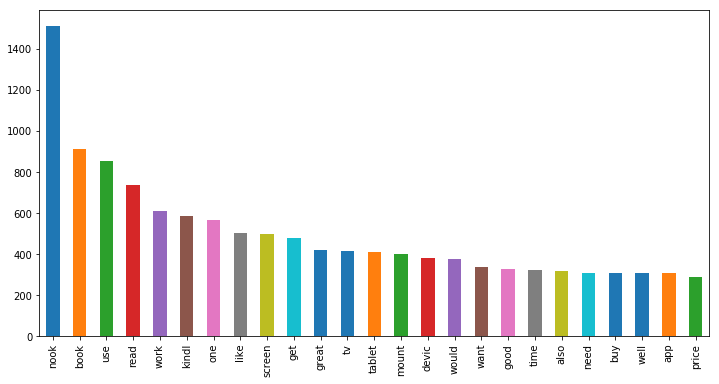

In [433]:
# c. Identify top 25 unigrams and filter their respective columns from DTM

%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(12,6))
plt.show()

In [434]:
ndf=pd.DataFrame(df_dtm.sum().sort_values(ascending=False).head(25))

In [435]:
top25=ndf.index.tolist() # Top 25 rows

In [436]:
ndf_dtm=df_dtm[top]    # filter their respective columns from DTM

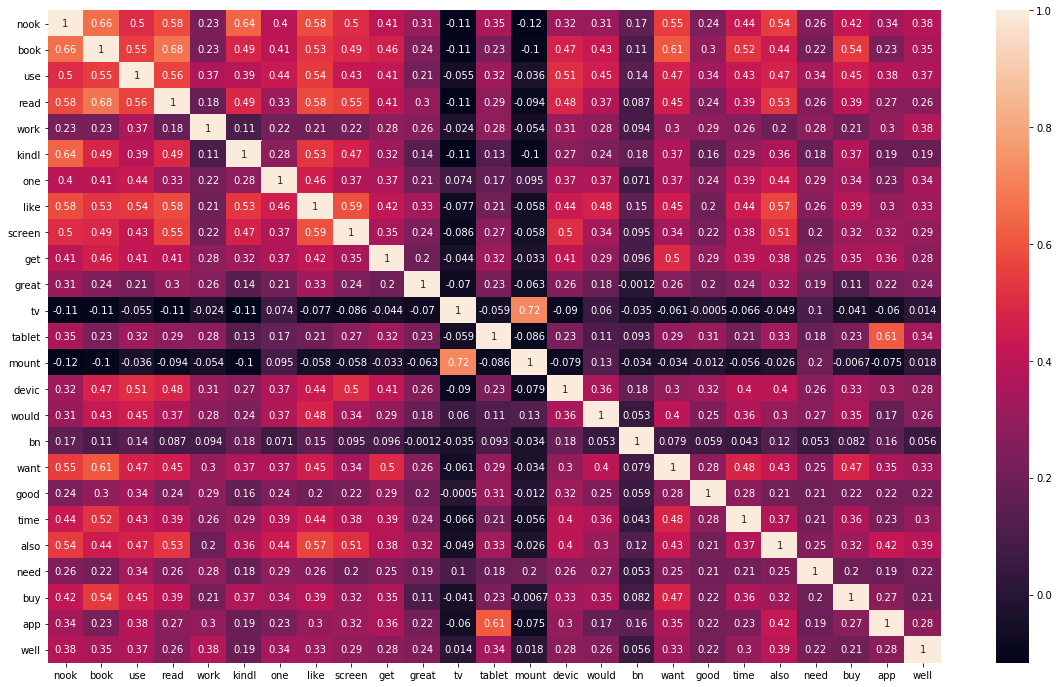

In [437]:
# d. Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function).

import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(ndf_dtm.corr(),annot=True)
plt.show()

 e. Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

- mount and TV
- book and want
- book and read
- kindl and nook
- tablet and app
- nook and book

# 3 Using the above Document Term Matrix
        a. Use K-means clustering to cluster the reviews in to four groups
        b. Plot a bar chart to display no. of documents under each group
        c. Create Word cloud for each group

In [444]:
from sklearn.cluster import KMeans


In [450]:
model=KMeans(n_clusters=4,random_state=42)  # to Cluster the reviews into 4 groups
model.fit(df_dtm)
labels=model.predict(df_dtm)
labels

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,

In [451]:
df_dtm['cluster']=labels

In [454]:
df_dtm.cluster.value_counts()

0    849
2    123
1     19
3      1
Name: cluster, dtype: int64

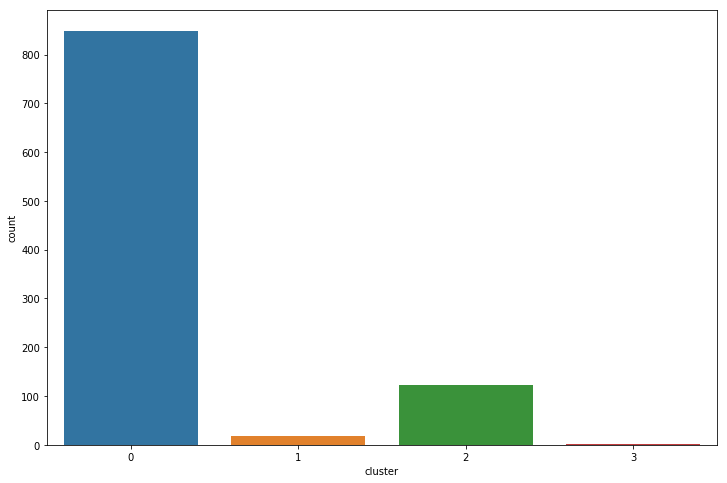

In [455]:
plt.figure(figsize=(12,8))
sns.countplot(df_dtm.cluster)
plt.show()

In [457]:
a=df_dtm[df_dtm.cluster==0]
b=df_dtm[df_dtm.cluster==1]
c=df_dtm[df_dtm.cluster==2]
d=df_dtm[df_dtm.cluster==3]

# 4. Using Yelp reviews data set (https://bit.ly/2U7mLmC), create a supervised model to predict the sentiment of user reviews.
        a. Create a word cloud using the user reviews
        b. Use random_state=100 while splitting data in to training (80%) and testing(20%).
        c. Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
        d. Build various supervised classification models using the training data set
        e. Predict and compute accuracy of the model on test data set
        f. Identify which model is best for sentiment prediction

In [364]:
#yelp=pd.read_csv('https://bit.ly/2U7mLmC',sep='\t')
#yelp.head()

In [460]:
df=pd.read_csv('yelp_labelled.csv',header=-1)

In [461]:
df.columns=['review','Sentiment','1','2','3','4']
df.head()

,review,Sentiment,1,2,3,4
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN


In [462]:
df4=pd.concat([df[df.Sentiment=='0'],df[df.Sentiment=='1']],axis=0)

In [463]:
df4.head()

,review,Sentiment,1,2,3,4
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
5,Now I am getting angry and I want my damn pho.,0,NaN,NaN,NaN,NaN
6,Honeslty it didn't taste THAT fresh.),0,NaN,NaN,NaN,NaN
7,The potatoes were like rubber and you could te...,0,NaN,NaN,NaN,NaN


In [464]:
# Drop the columns with null values

df4.dropna(axis=1,inplace=True)

In [465]:
df=df4

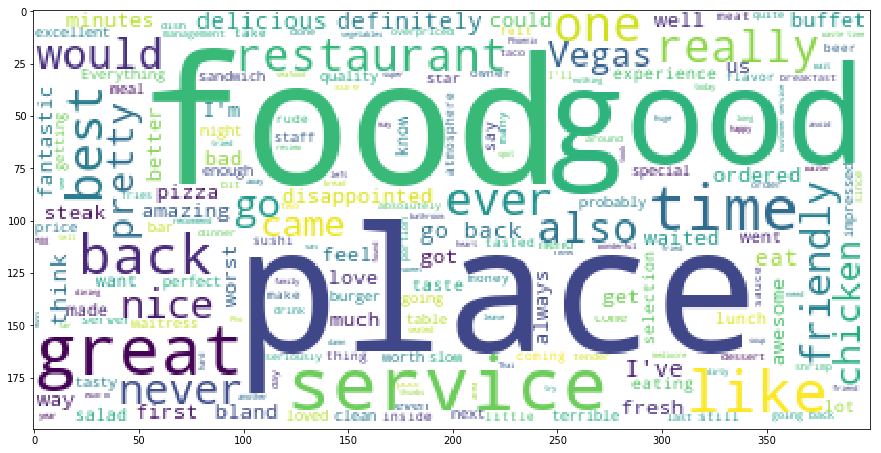

In [466]:
#  a.Create a word cloud using the user reviews

plt.figure(figsize=(15,10))
text=' '.join(df['review'])
stopwords = nltk.corpus.stopwords.words('english')
wc=WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [467]:

import nltk
docs=df['review'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

1                                           crust good
2                                   tasti textur nasti
5                              get angri want damn pho
6                            honeslti didnt tast fresh
7    potato like rubber could tell made ahead time ...
Name: review, dtype: object

In [468]:
# b. Use random_state=100 while splitting data in to training (80%) and testing(20%).


# splitting of Data
x=docs_clean
y=df['Sentiment']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=100)

vectorizer = CountVectorizer()
vectorizer.fit(xtrain)
dtm_train= vectorizer.transform(xtrain)
dtm_test = vectorizer.transform(xtest)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape,df_dtm_test.shape

((562, 1001), (141, 1001))

In [469]:
# Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
df.Sentiment.value_counts()

# It Contains a balanced Class

0    354
1    349
Name: Sentiment, dtype: int64

In [470]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model_rf = RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(df_dtm_train,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [471]:
pred_class=model_rf.predict(df_dtm_test)  
accuracy_score(ytest,pred_class)


0.8014184397163121

In [472]:
from sklearn.metrics import classification_report
# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class)) 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        80
           1       0.77      0.77      0.77        61

   micro avg       0.80      0.80      0.80       141
   macro avg       0.80      0.80      0.80       141
weighted avg       0.80      0.80      0.80       141



In [473]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
nb_clfr=MultinomialNB()
nb_clfr.fit(df_dtm_train,ytrain)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(ytest,pred_class)


0.7943262411347518

In [474]:
# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class))  

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        80
           1       0.71      0.89      0.79        61

   micro avg       0.79      0.79      0.79       141
   macro avg       0.80      0.81      0.79       141
weighted avg       0.81      0.79      0.79       141



In [475]:
nb_clfr=GaussianNB()
nb_clfr.fit(df_dtm_train,ytrain)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(ytest,pred_class)

0.7375886524822695

In [476]:
# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class))  

              precision    recall  f1-score   support

           0       0.85      0.65      0.74        80
           1       0.65      0.85      0.74        61

   micro avg       0.74      0.74      0.74       141
   macro avg       0.75      0.75      0.74       141
weighted avg       0.76      0.74      0.74       141



#####  From the above we can understand that Random Forest is the best model becasue it is giving an accuracy of 80.14, the also gives the best  recall,  f1-score   

# 5. Identify sentiment for the yelp reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.

In [477]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

In [478]:
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    return 0 if compound < 0 else 1

df['vader'] = df['review'].apply(get_sentiment)
df['vader'].value_counts()

1    524
0    179
Name: vader, dtype: int64

In [479]:
df.Sentiment=df.Sentiment.astype('int64')

In [480]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Sentiment'],df['vader'])       # Accuracy of Unsupervised model

0.7197724039829303

##### Performance of supervised vs unsupervised sentiment prediction: From the above we can see that supervised model is giving a better Accuracy than the unsupervised models

# 6. Apply topic modelling to Narendra Modi tweets dataset(https://bit.ly/2Uk7oH5). Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [486]:
Tweet=pd.read_csv('https://bit.ly/2Uk7oH5')

In [344]:
#Tweet=pd.read_csv('Exam-narendramodi_tweets.csv.txt')

In [487]:
Tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [488]:
Tweet.drop(columns='id',inplace=True)

In [305]:
Tweet.isnull().sum()

retweets_count          0
favorite_count          0
created_at              0
text                    0
lang                    0
retweeted               0
followers_count         0
friends_count           0
hashtags_count          0
description             0
location                0
background_image_url    0
source                  0
dtype: int64

In [489]:
docs=Tweet['text'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head(1)

0    the presidents address wonderfully encapsulate...
Name: text, dtype: object

In [490]:
import gensim

In [491]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good','amp','rt','pm','us'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [492]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [493]:
#list(dictionary.values())

In [494]:
#list(dictionary.keys())

In [495]:
#list(zip(dictionary.keys(),dictionary.values()))

In [496]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [497]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4,random_state=100)


In [498]:
lda_model.get_topic_terms(1)

[(428, 0.008946002),
 (325, 0.0069875307),
 (235, 0.005452722),
 (183, 0.0051815747),
 (16, 0.0049825497),
 (4, 0.004799868),
 (262, 0.004698543),
 (324, 0.004012054),
 (173, 0.0038557127),
 (995, 0.0037406762)]

In [499]:
df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
df.sort_values(by='probs').iloc[-1]['topics']

0.0

In [500]:
topics=[]
for doc in docs_bow:
    df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
Tweet['topics']=topics

In [501]:
lda_model.print_topics()

[(0,
  '0.008*"india" + 0.007*"wish" + 0.007*"peopl" + 0.004*"tirangayatra" + 0.004*"thank" + 0.004*"join" + 0.004*"congratul" + 0.004*"year" + 0.004*"greet" + 0.003*"discuss"'),
 (1,
  '0.009*"nation" + 0.007*"wish" + 0.005*"today" + 0.005*"join" + 0.005*"ji" + 0.005*"india" + 0.005*"peopl" + 0.004*"thank" + 0.004*"day" + 0.004*"yoga"'),
 (2,
  '0.018*"india" + 0.008*"peopl" + 0.008*"pmoindia" + 0.008*"narendramodi" + 0.005*"thank" + 0.005*"develop" + 0.005*"tie" + 0.005*"ji" + 0.004*"sandeshsoldi" + 0.004*"today"'),
 (3,
  '0.012*"india" + 0.007*"meet" + 0.005*"interact" + 0.004*"work" + 0.004*"proud" + 0.004*"mani" + 0.004*"today" + 0.003*"also" + 0.003*"make" + 0.003*"spoke"')]

In [337]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [338]:

c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=i,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

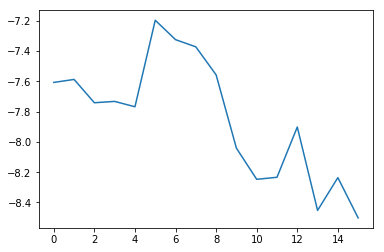

In [320]:
plt.plot(c_scores)
plt.show()

In [355]:
Tweet['topics'].value_counts()

2.0    1026
3.0     780
0.0     724
1.0     690
Name: topics, dtype: int64

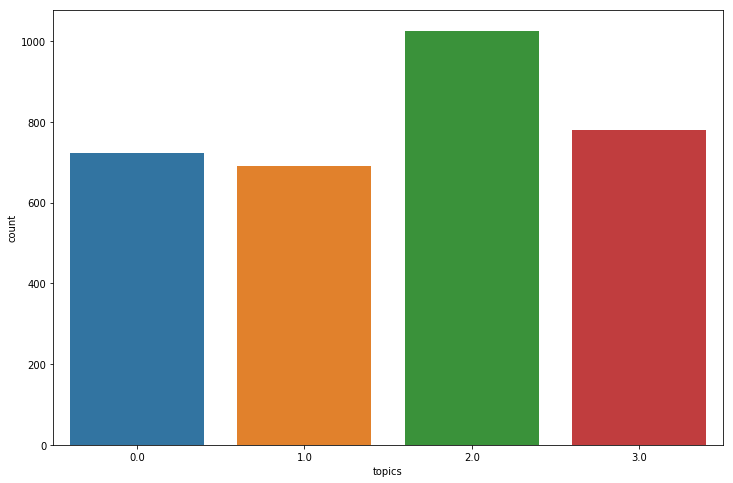

In [356]:
plt.figure(figsize=(12,8))
sns.countplot(Tweet.topics)
plt.show()

In [357]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=10,random_state=100)

In [358]:
df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
df.sort_values(by='probs').iloc[-1]['topics']

7.0

In [359]:
topics=[]
for doc in docs_bow:
    df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
Tweet['topics']=topics

In [360]:
lda_model.print_topics()

[(0,
  '0.008*"india" + 0.008*"wish" + 0.006*"peopl" + 0.006*"also" + 0.005*"initi" + 0.004*"join" + 0.004*"discuss" + 0.004*"greet" + 0.004*"today" + 0.004*"congratul"'),
 (1,
  '0.008*"nation" + 0.006*"join" + 0.006*"india" + 0.005*"today" + 0.005*"mannkibaat" + 0.005*"yoga" + 0.005*"wish" + 0.005*"peopl" + 0.004*"ji" + 0.004*"spoke"'),
 (2,
  '0.017*"india" + 0.008*"peopl" + 0.008*"pmoindia" + 0.008*"narendramodi" + 0.008*"tie" + 0.007*"meet" + 0.007*"today" + 0.005*"develop" + 0.005*"thank" + 0.005*"take"'),
 (3,
  '0.013*"india" + 0.009*"meet" + 0.007*"interact" + 0.005*"today" + 0.005*"visit" + 0.005*"make" + 0.004*"proud" + 0.004*"work" + 0.004*"mani" + 0.004*"also"'),
 (4,
  '0.012*"discuss" + 0.010*"presid" + 0.009*"india" + 0.008*"share" + 0.007*"tie" + 0.006*"today" + 0.005*"develop" + 0.005*"meet" + 0.005*"mannkibaat" + 0.004*"nation"'),
 (5,
  '0.010*"wish" + 0.009*"thank" + 0.007*"congratul" + 0.006*"india" + 0.006*"peopl" + 0.004*"year" + 0.004*"award" + 0.004*"join" + 0

In [361]:
Tweet['topics'].value_counts()

2.0    402
9.0    350
4.0    349
5.0    338
6.0    330
8.0    326
7.0    305
3.0    292
0.0    271
1.0    257
Name: topics, dtype: int64

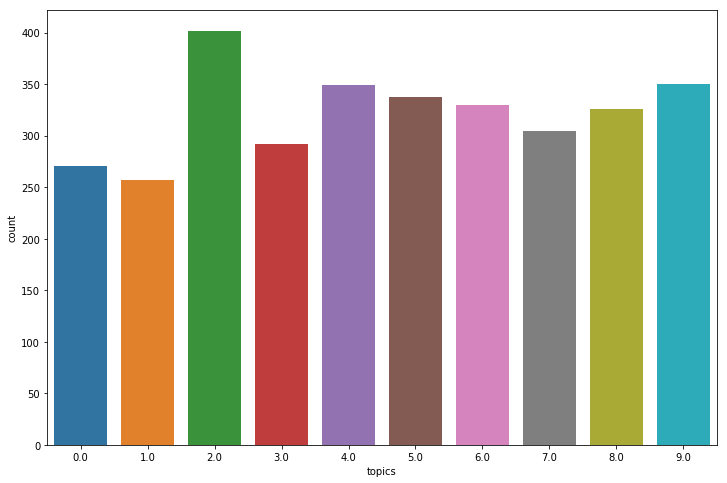

In [362]:
plt.figure(figsize=(12,8))
sns.countplot(Tweet.topics)
plt.show()